<a href="https://colab.research.google.com/github/easyhardhoon/SSLACK/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import os
import zipfile

#처음 한번만 실행할 것
os.mkdir("/content/drive/MyDrive/CNN_V7/dataset")
os.mkdir("/content/drive/MyDrive/CNN_V7/test_dataset")
###

local_zip = '/content/drive/MyDrive/CNN_V7/dd_total.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/CNN_V7/dataset/dd')
zip_ref.close()

local_zip = '/content/drive/MyDrive/CNN_V7/t_total.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/CNN_V7/dataset/t')
zip_ref.close()

local_zip = '/content/drive/MyDrive/CNN_V7/b_total.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/CNN_V7/dataset/b')
zip_ref.close()


In [95]:
shutil.rmtree('/content/drive/MyDrive/CNN_V7/dataset')
shutil.rmtree('/content/drive/MyDrive/CNN_V7/test_dataset')

In [97]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil
import keras
import tensorflow

In [101]:
import pathlib
data_dir = "/content/drive/MyDrive/CNN_V7/dataset"
data_dir = pathlib.Path(data_dir)

#image_count = len(list(data_dir.glob('*/*.jpg')))
#print(image_count)
print("훈련용 dd 이미지 갯수 : ", len(os.listdir("/content/drive/MyDrive/CNN_V7/dataset/dd")))
print("훈련용 t 이미지 갯수 : ", len(os.listdir("/content/drive/MyDrive/CNN_V7/dataset/t")))
print("훈련용 u 이미지 갯수 : ", len(os.listdir("/content/drive/MyDrive/CNN_V7/dataset/b")))

훈련용 dd 이미지 갯수 :  5000
훈련용 t 이미지 갯수 :  5000
훈련용 u 이미지 갯수 :  5000


In [113]:
import os
import glob

path_b = "/content/drive/MyDrive/CNN_V7/dataset/b"
files = glob.glob(path_b + '/*')

for i, f in enumerate(files):
    os.rename(f, os.path.join(path_b, '{0:d}'.format(i) + ".png"))

path_dd = "/content/drive/MyDrive/CNN_V7/dataset/dd"
files = glob.glob(path_dd + '/*')

for i, f in enumerate(files):
    os.rename(f, os.path.join(path_dd, '{0:d}'.format(i) + ".png"))

path_t = "/content/drive/MyDrive/CNN_V7/dataset/t"
files = glob.glob(path_t + '/*')

for i, f in enumerate(files):
    os.rename(f, os.path.join(path_t, '{0:d}'.format(i) + ".png"))
#밑에 데이터 타입 png인지 jpg확인할 것

In [100]:
# original_dataset_dir_b = '/content/drive/MyDrive/CNN_V7/dataset/b'
# original_dataset_dir_dd = '/content/drive/MyDrive/CNN_V7/dataset/dd'
# original_dataset_dir_t = '/content/drive/MyDrive/CNN_V7/dataset/t'
# # 소규모 데이터셋을 저장할 디렉터리
# base_dir = '/content/drive/MyDrive/CNN_V7/test_dataset'
# if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
#     shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
# os.mkdir(base_dir)

# # vaildation을 위한 디렉터리
# b_dir = os.path.join(base_dir, 'b')
# os.mkdir(b_dir)
# dd_dir = os.path.join(base_dir, 'dd')
# os.mkdir(dd_dir)
# t_dir = os.path.join(base_dir, 't')
# os.mkdir(t_dir)



# # 처음 2,000개의 된소리 이미지를 b_dir에 이동합니다
# fnames = ['{}.png'.format(i) for i in range(3000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir_b, fname)
#     dst = os.path.join(b_dir, fname)
#     shutil.move(src, dst)

# # 처음 2,000개의 된소리 이미지를 dd_dir에 이동합니다
# fnames = ['{}.png'.format(i) for i in range(3000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir_dd, fname)
#     dst = os.path.join(dd_dir, fname)
#     shutil.move(src, dst)
    
# # 처음 2,000개의 된소리 이미지를 t_dir에 이동합니다
# fnames = ['{}.png'.format(i) for i in range(3000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir_t, fname)
#     dst = os.path.join(t_dir, fname)
#     shutil.move(src, dst)



In [116]:
b_dir = os.path.join( '/content/drive/MyDrive/CNN_V7/dataset/b')
dd_dir = os.path.join( '/content/drive/MyDrive/CNN_V7/dataset/dd')
t_dir = os.path.join( '/content/drive/MyDrive/CNN_V7/dataset/t')

rock_files = os.listdir(b_dir)
paper_files = os.listdir(dd_dir)
scissors_files = os.listdir(t_dir)

print('Total number of training ㅠ images:', len(rock_files))
print('Total number of training 된소리 images:', len(paper_files))
print('Total number of training ㅅ images:', len(scissors_files))

print(rock_files[:10])
print(paper_files[:10])
print(scissors_files[:10])

Total number of training ㅠ images: 5000
Total number of training 된소리 images: 5000
Total number of training ㅅ images: 5000
['3000.png', '3001.png', '3002.png', '3003.png', '3004.png', '3005.png', '3006.png', '3007.png', '3008.png', '3009.png']
['3000.png', '3001.png', '3002.png', '3003.png', '3004.png', '3005.png', '3006.png', '3007.png', '3008.png', '3009.png']
['3000.png', '3001.png', '3002.png', '3003.png', '3004.png', '3005.png', '3006.png', '3007.png', '3008.png', '3009.png']


/content/drive/MyDrive/CNN_V7/dataset/b/3000.png


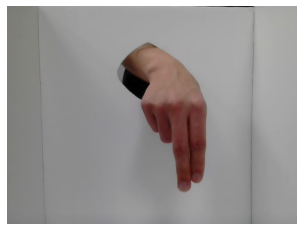

/content/drive/MyDrive/CNN_V7/dataset/b/3001.png


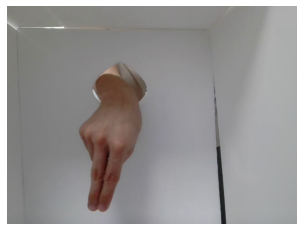

/content/drive/MyDrive/CNN_V7/dataset/dd/3000.png


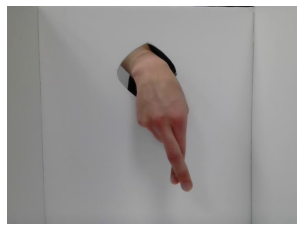

/content/drive/MyDrive/CNN_V7/dataset/dd/3001.png


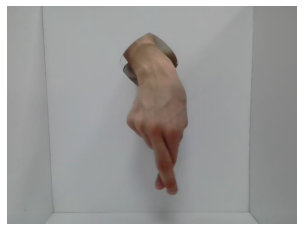

/content/drive/MyDrive/CNN_V7/dataset/t/3000.png


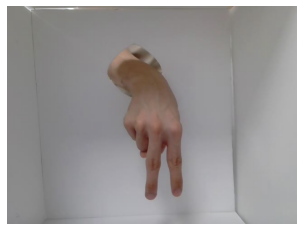

/content/drive/MyDrive/CNN_V7/dataset/t/3001.png


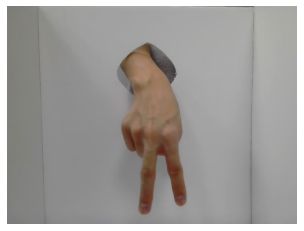

In [103]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_b = [os.path.join(b_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_dd = [os.path.join(dd_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_t = [os.path.join(t_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_b + next_dd + next_t):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [121]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR =  '/content/drive/MyDrive/CNN_V7/dataset'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = '/content/drive/MyDrive/CNN_V7/test_dataset'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(150,150),
class_mode='categorical',
batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150,150),
class_mode='categorical',
batch_size=126
)
print("hihihihihi")
model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The fourth convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()



Found 15000 images belonging to 3 classes.
Found 9000 images belonging to 3 classes.
hihihihihi
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 34, 34, 128)       73856     
                       

In [122]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs= 20, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("/content/drive/MyDrive/CNN_V7/model/model.h5")

Epoch 1/20
20/20 [==============================] - 39s 2s/step - loss: 1.2699 - accuracy: 0.3480 - val_loss: 1.0959 - val_accuracy: 0.3571
Epoch 2/20
20/20 [==============================] - 34s 2s/step - loss: 1.1036 - accuracy: 0.3361 - val_loss: 1.0949 - val_accuracy: 0.3571
Epoch 3/20
20/20 [==============================] - 35s 2s/step - loss: 1.1094 - accuracy: 0.3560 - val_loss: 1.1002 - val_accuracy: 0.3069
Epoch 4/20
20/20 [==============================] - 38s 2s/step - loss: 1.0870 - accuracy: 0.3806 - val_loss: 1.0331 - val_accuracy: 0.4630
Epoch 5/20
20/20 [==============================] - 33s 2s/step - loss: 1.0932 - accuracy: 0.4357 - val_loss: 1.2860 - val_accuracy: 0.3095
Epoch 6/20
20/20 [==============================] - 33s 2s/step - loss: 1.0416 - accuracy: 0.4583 - val_loss: 0.8697 - val_accuracy: 0.4709
Epoch 7/20
20/20 [==============================] - 33s 2s/step - loss: 1.0404 - accuracy: 0.4913 - val_loss: 0.8191 - val_accuracy: 0.6746
Epoch 8/20
20/20 [==

In [124]:
model.save("/content/drive/MyDrive/CNN_V7/model/final_modelv3.h5")

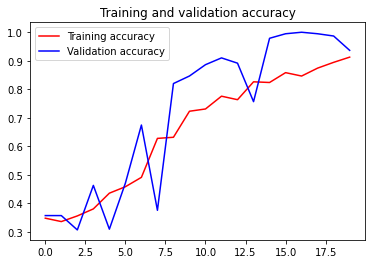

<Figure size 432x288 with 0 Axes>

In [125]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/CNN_V7/model/model.h5')

In [126]:
from keras.utils import load_img, img_to_array, array_to_img
from tensorflow import keras
from PIL import Image
import tensorflow as tf
import numpy as np
img_path = "/content/drive/MyDrive/CNN_V7/ㅠ.jpg"

img = keras.preprocessing.image.load_img(
    img_path, target_size=(150, 150)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
class_names=["ㅠ","된소리"," ㅅ"]
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 83ms/step
This image most likely belongs to 된소리 with a 57.61 percent confidence.


In [42]:
print(score)

tf.Tensor([0.21194157 0.21194157 0.57611686], shape=(3,), dtype=float32)


In [50]:
print(model)

In [135]:
from keras.models import load_model
from keras.utils import load_img, img_to_array, array_to_img
from tensorflow import keras
from PIL import Image
import tensorflow as tf
import numpy as np

model = load_model('/content/drive/MyDrive/CNN_V7/model/final_modelv3.h5')


img_path = "/content/drive/MyDrive/CNN_V7/test/ㅠ2.jpg"

img = keras.preprocessing.image.load_img(
    img_path, target_size=(150, 150)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
class_names=["ㅠ","된소리"," ㅅ"]
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 71ms/step
This image most likely belongs to ㅠ with a 57.61 percent confidence.
